In [ ]:
import zipfile
import os
import urllib.request

url = 'https://github.com/dicodingacademy/assets/releases/download/release/rockpaperscissors.zip'
filename = 'rockpaperscissors.zip'
urllib.request.urlretrieve(url, filename)

with zipfile.ZipFile(filename, 'r') as archive:
    archive.extractall()

print(os.listdir('rockpaperscissors'))


['rock', 'rps-cv-images', 'paper', 'README_rpc-cv-images.txt', 'scissors']


In [ ]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator

data_directory = 'rockpaperscissors/rps-cv-images'

data_gen = ImageDataGenerator(
    rescale=1./255,
    rotation_range=25,
    horizontal_flip=True,
    shear_range=0.15,
    zoom_range=0.1,
    fill_mode='nearest',
    validation_split=0.4
)

training_data = data_gen.flow_from_directory(
    data_directory,
    target_size=(150, 150),
    batch_size=32,
    class_mode='categorical',
    subset='training'
)

validation_data = data_gen.flow_from_directory(
    data_directory,
    target_size=(150, 150),
    batch_size=32,
    class_mode='categorical',
    subset='validation'
)


Found 1314 images belonging to 3 classes.
Found 874 images belonging to 3 classes.


In [ ]:
import tensorflow as tf
from tensorflow.keras import layers, models

nn_model = models.Sequential([
    layers.Conv2D(32, (3, 3), activation='relu', input_shape=(150, 150, 3)),
    layers.Conv2D(32, (3, 3), activation='relu'),
    layers.MaxPooling2D(2, 2),
    layers.Conv2D(64, (3, 3), activation='relu'),
    layers.Conv2D(64, (3, 3), activation='relu'),
    layers.MaxPooling2D(2, 2),
    layers.Conv2D(128, (3, 3), activation='relu'),
    layers.MaxPooling2D(2, 2),
    layers.Flatten(),
    layers.Dense(512, activation='relu'),
    layers.Dense(128, activation='relu'),
    layers.Dense(3, activation='softmax')
])

nn_model.compile(optimizer=tf.keras.optimizers.Adam(learning_rate=0.001),
                 loss='categorical_crossentropy',
                 metrics=['accuracy'])


In [ ]:
steps_per_epoch = 1314 // 32
validation_steps = 874 // 32

history = nn_model.fit(
    training_data,
    steps_per_epoch=steps_per_epoch,
    epochs=20,
    validation_data=validation_data,
    validation_steps=validation_steps,
    verbose=2
)

Epoch 1/20
41/41 - 17s - 404ms/step - accuracy: 0.5936 - loss: 0.8750 - val_accuracy: 0.6377 - val_loss: 0.7842
Epoch 2/20
41/41 - 0s - 6ms/step - accuracy: 0.6875 - loss: 0.7190 - val_accuracy: 0.6000 - val_loss: 0.5888
Epoch 3/20
41/41 - 17s - 418ms/step - accuracy: 0.8190 - loss: 0.4779 - val_accuracy: 0.8993 - val_loss: 0.2794
Epoch 4/20
41/41 - 0s - 2ms/step - accuracy: 0.9062 - loss: 0.3169 - val_accuracy: 0.8000 - val_loss: 0.5753
Epoch 5/20
41/41 - 16s - 385ms/step - accuracy: 0.9056 - loss: 0.2817 - val_accuracy: 0.9201 - val_loss: 0.2425
Epoch 6/20
41/41 - 0s - 2ms/step - accuracy: 0.8438 - loss: 0.4689 - val_accuracy: 1.0000 - val_loss: 0.0335
Epoch 7/20
41/41 - 16s - 387ms/step - accuracy: 0.9041 - loss: 0.2542 - val_accuracy: 0.8426 - val_loss: 0.4533
Epoch 8/20
41/41 - 0s - 3ms/step - accuracy: 0.8750 - loss: 0.2862 - val_accuracy: 0.8000 - val_loss: 0.8372
Epoch 9/20
41/41 - 20s - 496ms/step - accuracy: 0.9111 - loss: 0.2330 - val_accuracy: 0.9155 - val_loss: 0.2375
Epoc

Saving paper_dicoding2.png to paper_dicoding2.png
Saving rock_dicoding2.png to rock_dicoding2.png
Saving rock_dicoding.jpeg to rock_dicoding (2).jpeg
Saving paper_dicoding.jpg to paper_dicoding (2).jpg
Saving scissors_dicoding.jpeg to scissors_dicoding (2).jpeg
Saving scissors_dicoding.png to scissors_dicoding (1).png
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step


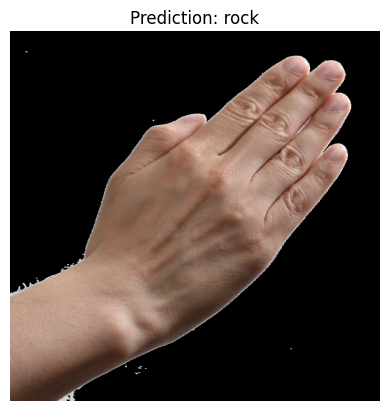

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step


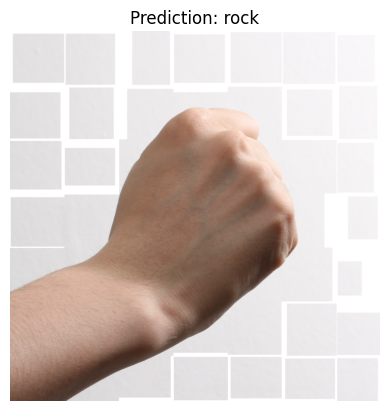

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step


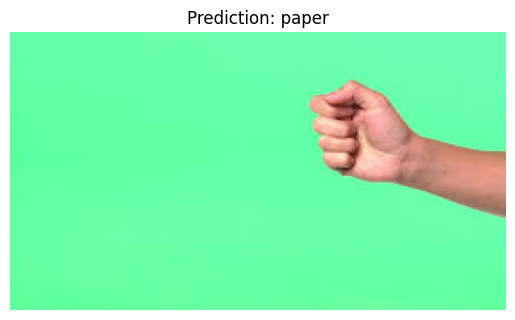

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step


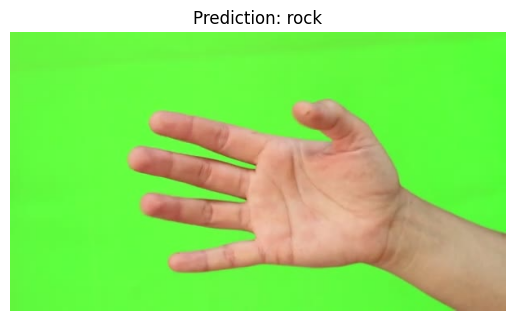

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 23ms/step


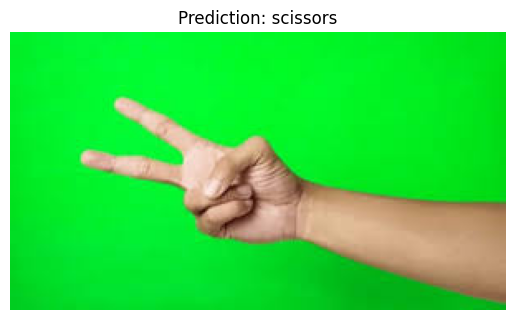

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 31ms/step


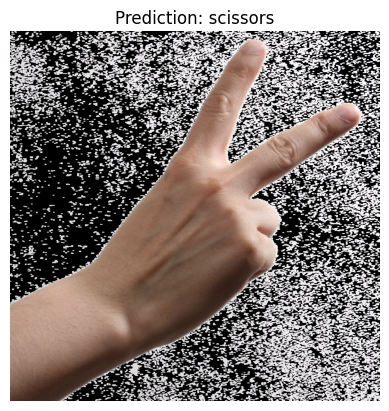

In [ ]:
from google.colab import files
from tensorflow.keras.preprocessing import image
import numpy as np
import matplotlib.pyplot as plt

uploaded_images = files.upload()

labels = ['rock', 'paper', 'scissors']

for img_file in uploaded_images.keys():
    img = image.load_img(img_file, target_size=(150, 150))
    img_array = image.img_to_array(img) / 255.0
    img_array = np.expand_dims(img_array, axis=0)

    prediction = nn_model.predict(img_array)
    predicted_label = labels[np.argmax(prediction)]

    plt.imshow(image.load_img(img_file))
    plt.title(f'Prediction: {predicted_label}')
    plt.axis('off')
    plt.show()



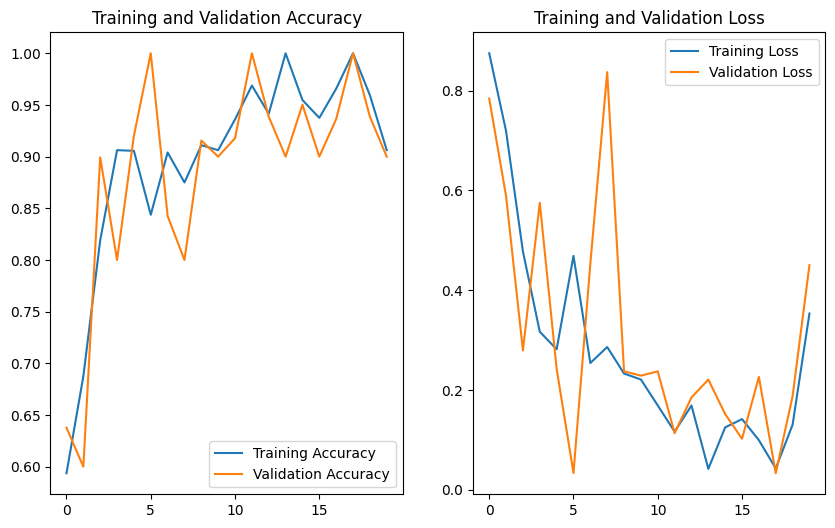

In [ ]:
import matplotlib.pyplot as plt

training_accuracy = history.history['accuracy']
validation_accuracy = history.history['val_accuracy']
training_loss = history.history['loss']
validation_loss = history.history['val_loss']

epochs = range(len(training_accuracy))

plt.figure(figsize=(10, 6))
plt.subplot(1, 2, 1)
plt.plot(epochs, training_accuracy, label='Training Accuracy')
plt.plot(epochs, validation_accuracy, label='Validation Accuracy')
plt.legend(loc='lower right')
plt.title('Training and Validation Accuracy')

plt.subplot(1, 2, 2)
plt.plot(epochs, training_loss, label='Training Loss')
plt.plot(epochs, validation_loss, label='Validation Loss')
plt.legend(loc='upper right')
plt.title('Training and Validation Loss')
plt.show()
